### Training/Testing Split

In [65]:
!pip install scikit-learn

In [66]:
from sklearn.model_selection import train_test_split

X = df['lemmatized_text']  
y = df['category']    


x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,       # 25% of the data will be allocated to the test set
    stratify=y,           # Stratify based on the labels to maintain distribution
    random_state=42       
)


In [67]:
x_train

1264                                                   update add additional functionality dfrsyn partial fulfillment dfr give existence directory tmpdfrtest several file locally run duracloud instance adminapw credential file upload active queue status info report
88                                                                                                                                                                                                                remove class provide backward compatibility eclipse swt
1414                                                  feature teststartprofilespecpersistsjobsforeachfileinanonrecursivedirresourcenode correct fail win pick hidden linux modify looks resource windows linux satisfactory fix need understand behavior future cbbedaddf
1148                                                                                                                                                                                  rename performance t

In [68]:
category_counts = y_test.value_counts()

print(category_counts)


category
functional    87
bugfix        87
external      85
internal      85
code smell    81
Name: count, dtype: int64


In [69]:
category_counts = y_train.value_counts()
print(category_counts)

category
bugfix        261
functional    259
internal      257
external      255
code smell    243
Name: count, dtype: int64


In [70]:
y_train.count()

1275

In [71]:
x_train_path = r"../dataset/x_train.csv"

x_train.to_csv(x_train_path, index=False)

In [72]:
y_train_path = r"../dataset/y_train.csv"

y_train.to_csv(y_train_path, index=False)

In [73]:
x_test_path = r"../dataset/x_test.csv"

x_test.to_csv(x_test_path, index=False)

In [74]:
y_test_path = r"../dataset/y_test.csv"

y_test.to_csv(y_test_path, index=False)

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)

# Fit and transform the training data
x_train_tfidf = vectorizer.fit_transform(x_train)

# Only transform the testing data
x_test_tfidf = vectorizer.transform(x_test)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classification": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionary to store the accuracy of each classifier
accuracy_results = {}

# Train and evaluate each classifier
for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test_tfidf)
    
    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[classifier_name] = accuracy
    print(f"{classifier_name} Accuracy: {accuracy}")


Random Forest Accuracy: 0.8329411764705882
Logistic Regression Accuracy: 0.8305882352941176
Multinomial Naive Bayes Accuracy: 0.7576470588235295
K-Nearest Neighbors Accuracy: 0.611764705882353
Support Vector Classification Accuracy: 0.8329411764705882
Decision Tree Accuracy: 0.7905882352941176


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers with specified hyperparameters
classifiers = {
    "Random Forest": RandomForestClassifier(max_depth=70, n_estimators=58, criterion='gini', bootstrap=False),
    "Support Vector Classification": SVC(gamma=1.9, kernel='linear', C=1.0),
    "Decision Tree": DecisionTreeClassifier(max_depth=75, criterion='gini'),
    "Logistic Regression": LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),
    "Multinomial Naive Bayes": MultinomialNB(alpha=0.63),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=69, weights='uniform')
}

# Train and evaluate each classifier
for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test_tfidf)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier_name} Accuracy: {accuracy}")


Random Forest Accuracy: 0.8447058823529412
Support Vector Classification Accuracy: 0.8282352941176471
Decision Tree Accuracy: 0.7811764705882352
Logistic Regression Accuracy: 0.8329411764705882
Multinomial Naive Bayes Accuracy: 0.7505882352941177
K-Nearest Neighbors Accuracy: 0.7341176470588235


In [79]:
from sklearn.metrics import classification_report

classifiers = {
    "Random Forest": RandomForestClassifier(max_depth=78, n_estimators=500, criterion='gini', bootstrap=False),
    "Support Vector Classification": SVC(gamma='scale', kernel='linear', C=1.99),
    "Decision Tree": DecisionTreeClassifier(max_depth=75, criterion='gini'),
    "Logistic Regression": LogisticRegression(penalty='l1', C=1.0, solver='liblinear'),
    "Multinomial Naive Bayes": MultinomialNB(alpha=2.63),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=69, weights='uniform')
}

evaluation_reports = {}

# Train, predict, and evaluate each classifier separately
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    
    # Train the classifier
    classifier.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test_tfidf)
    
    # Generate a classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print accuracy and store the report for further analysis
    print(f"{classifier_name} Accuracy: {report['accuracy']}")
    evaluation_reports[classifier_name] = report
    
    # Detailed report
    print(f"{classifier_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    


Training Random Forest...
Random Forest Accuracy: 0.8329411764705882
Random Forest Classification Report:
              precision    recall  f1-score   support

      bugfix       0.81      0.77      0.79        87
  code smell       0.96      0.98      0.97        81
    external       0.73      0.85      0.78        85
  functional       0.82      0.72      0.77        87
    internal       0.87      0.86      0.86        85

    accuracy                           0.83       425
   macro avg       0.84      0.84      0.83       425
weighted avg       0.84      0.83      0.83       425

Training Support Vector Classification...
Support Vector Classification Accuracy: 0.8211764705882353
Support Vector Classification Classification Report:
              precision    recall  f1-score   support

      bugfix       0.76      0.71      0.73        87
  code smell       0.93      0.96      0.95        81
    external       0.82      0.79      0.80        85
  functional       0.71      0.82 

In [80]:
def fit(self, X, y):
        
        X_preprocessed = preprocess(X.copy())
        
        # Separating text data for TF-IDF transformation
        text_data = X_preprocessed.pop('combined_text')
        
        text_features = self.tfidf_vectorizer.fit_transform(text_data)
        
        # Combining text features with other features
        X_combined = np.hstack((text_features.toarray(), X_preprocessed.values))
        
        self.classifier.fit(X_combined, y)
        
        # Define a broad range of parameters for RandomizedSearchCV
        rf_random_params = {
            'n_estimators': np.arange(100, 1001, 100),
            'max_depth': np.arange(10, 101, 10),
            'min_samples_split': np.arange(2, 11, 1),
            'criterion': ['gini', 'entropy']
        }
        
        # Randomized Search with Cross-Validation
        self.rfc = RandomForestClassifier(class_weight="balanced", random_state=42)
        random_search = RandomizedSearchCV(self.rfc, rf_random_params, n_iter=100, cv=5, scoring='f1', n_jobs=-1, random_state=42)
        random_search.fit(X_combined, y)
        print("Best parameters from RandomizedSearch: ", random_search.best_params_)

        # Refine search with GridSearchCV around the best parameters found
        best_params = random_search.best_params_
        rf_grid_params = {
            'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
            'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10],
            'min_samples_split': [best_params['min_samples_split'] - 1, best_params['min_samples_split'], best_params['min_samples_split'] + 1],
            'criterion': [best_params['criterion']]
        }
        self.rscv = GridSearchCV(self.rfc, rf_grid_params, cv=5, scoring='f1', n_jobs=-1)
        self.rscv.fit(X_combined, y)
        print("Refined best parameters from GridSearchCV: ", self.rscv.best_params_)

In [81]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming x_train_tfidf and y_train are already defined as your training dataset and labels

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(class_weight="balanced", random_state=43)

# Define the parameter space for RandomizedSearchCV
random_grid = {
    'n_estimators': np.arange(101, 1001, 100),  # Number of trees in the forest
    'max_depth': np.arange(11, 101, 10),  # Maximum depth of the tree
    'bootstrap': [True, False],  # Method of selecting samples for training each tree
    'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
}

# Random search of parameters, using 4 fold cross validation,
# search across 101 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf_classifier, param_distributions=random_grid, n_iter=101, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(x_train_tfidf, y_train)

# Output the best parameters from RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(rf_random.best_params_)

# You can now take the best parameters from the random search and use them to
# create a more focused search with GridSearchCV (if necessary). This might involve
# narrower ranges of parameters or specific combinations that you want to test exhaustively.

# Refine search with GridSearchCV around the best parameters found
best_params = rf_random.best_params_
rf_grid_params = {
            'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
            'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10],            
            'criterion': [best_params['criterion']],
            'bootstrap': [best_params['bootstrap']]
}
rscv = GridSearchCV(rf_classifier, rf_grid_params, cv=5, scoring='f1', n_jobs=-1)
rscv.fit(x_train_tfidf, y_train)
print("Refined best parameters from GridSearchCV: ", rscv.best_params_)


# {'n_estimators': 1000, 'min_samples_split': 8, 'max_depth': 90, 'criterion': 'gini', 'bootstrap': False}
# Refined best parameters from GridSearchCV:  {'criterion': 'gini', 'max_depth': 80, 'min_samples_split': 7, 'n_estimators': 950}

# {'n_estimators': 200, 'max_depth': 40, 'criterion': 'gini', 'bootstrap': False}
# Refined best parameters from GridSearchCV:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'n_estimators': 150}

# {'bootstrap': False, 'criterion': 'gini', 'max_depth': 80, 'n_estimators': 950}
# {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 41, 'n_estimators': 551}

Fitting 3 folds for each of 101 candidates, totalling 303 fits
[CV] END bootstrap=True, criterion=gini, max_depth=21, n_estimators=101; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=21, n_estimators=101; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=21, n_estimators=101; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=41, n_estimators=101; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=41, n_estimators=101; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=41, n_estimators=101; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=31, n_estimators=101; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=31, n_estimators=101; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=31, n_estimators=101; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=61, n_estimators=101; total time=   0.5s
[C

/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/onkars

Refined best parameters from GridSearchCV:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 41, 'n_estimators': 551}


In [82]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Assuming x_train_tfidf and y_train are already defined

# Initialize the SVC model
svc = SVC(random_state=42)

# Define a parameter space for RandomizedSearchCV
param_distributions = {
    'C': np.logspace(-4, 4, 20),  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
}

# Random search of parameters, using 3 fold cross validation,
# search across a wide range of combinations, and use all available cores
svm_random = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
svm_random.fit(x_train_tfidf, y_train)

# Output the best parameters from RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for SVM:")
print(svm_random.best_params_)


# Extract the best parameters found by RandomizedSearchCV
best_params = svm_random.best_params_

# Create a parameter grid focused around the best parameters found
param_grid = {
    'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 2],
    'gamma': [best_params['gamma']],
    'kernel': [best_params['kernel']]
}

# Create a GridSearchCV for a more focused search
svm_grid = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
svm_grid.fit(x_train_tfidf, y_train)

# Output the best parameters from GridSearchCV
print("Refined best parameters from GridSearchCV for SVM:")
print(svm_grid.best_params_)




# Fitting 3 folds for each of 100 candidates, totalling 300 fits
# Best parameters found by RandomizedSearchCV for SVM:
# {'kernel': 'rbf', 'gamma': 0.001, 'C': 545.5594781168514}
# Fitting 5 folds for each of 9 candidates, totalling 45 fits
# Refined best parameters from GridSearchCV for SVM:
# {'C': 272.7797390584257, 'gamma': 0.002, 'kernel': 'rbf'}
# {'C': 5000.0, 'gamma': 'auto', 'kernel': 'rbf'}
# {'C': 14.881757208156566, 'gamma': 'auto', 'kernel': 'linear'}

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ....C=29.763514416313132, gamma=auto, kernel=linear; total time=   0.2s
[CV] END .....C=29.763514416313132, gamma=scale, kernel=poly; total time=   0.2s
[CV] END .....C=29.763514416313132, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ....C=29.763514416313132, gamma=auto, kernel=linear; total time=   0.2s
[CV] END ....C=29.763514416313132, gamma=auto, kernel=linear; total time=   0.2s
[CV] END ........C=1438.44988828766, gamma=auto, kernel=poly; total time=   0.2s
[CV] END .....C=29.763514416313132, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ........C=1438.44988828766, gamma=auto, kernel=poly; total time=   0.2s
[CV] END ..C=0.03359818286283781, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END ..C=0.03359818286283781, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END ........C=1438.44988828766, gamma=auto, kernel=poly; total time=   0.2s
[CV] END ..C=0.03359818286283781, gamma=auto, 

In [83]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Assuming x_train_tfidf and y_train are defined

# Initialize DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'max_depth': np.arange(10, 101, 10),  # Maximum depth of the tree
    'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
}

# Random search of parameters, using 3 fold cross validation,
# search across a wide range of combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
dt_random.fit(x_train_tfidf, y_train)

# Output the best parameters from RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for Decision Tree:")
print(dt_random.best_params_)

# Extract the best parameters found by RandomizedSearchCV
best_params = dt_random.best_params_

# Create a parameter grid focused around the best parameters found
param_grid = {
    'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10] if best_params['max_depth'] is not None else np.arange(5, 16, 5),
    'criterion': [best_params['criterion']]
}

# Create a GridSearchCV for a more focused search
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
dt_grid.fit(x_train_tfidf, y_train)

# Output the best parameters from GridSearchCV
print("Refined best parameters from GridSearchCV for Decision Tree:")
print(dt_grid.best_params_)

# {'criterion': 'gini', 'max_depth': 30}
# # {'criterion': 'gini', 'max_depth': 20}

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=40; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=40; total time=   0.0s
[CV] END .......................criterion=gini, 

/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found by RandomizedSearchCV for Decision Tree:
{'max_depth': 30, 'criterion': 'gini'}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .......................criterion=gini, max_depth=20; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=20; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=30; total time=   0.0s
[CV] END ...................

In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming x_train_tfidf and y_train are defined

# Initialize LogisticRegression
logistic_regression = LogisticRegression(random_state=42, max_iter=10000)

# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algorithm to use in the optimization problem
}

# Random search of parameters, using 3 fold cross validation,
# search across a wide range of combinations, and use all available cores
lr_random = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
lr_random.fit(x_train_tfidf, y_train)

# Output the best parameters from RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for Logistic Regression:")
print(lr_random.best_params_)

# Extract the best parameters found by RandomizedSearchCV
best_params = lr_random.best_params_

# Create a parameter grid focused around the best parameters found
param_grid = {
    'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 2],
    'penalty': [best_params['penalty']] if best_params['penalty'] != 'elasticnet' else ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] if best_params['penalty'] == 'l1' else ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Some combinations might not be compatible, adjust the grid as needed
# Create a GridSearchCV for a more focused search
lr_grid = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=10000), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
lr_grid.fit(x_train_tfidf, y_train)

# Output the best parameters from GridSearchCV
print("Refined best parameters from GridSearchCV for Logistic Regression:")
print(lr_grid.best_params_)

# {'C': 2.140666199359698, 'penalty': 'l2', 'solver': 'newton-cg'}
# {'C': 3.247553478377442, 'penalty': 'l1', 'solver': 'liblinear'}

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..C=78.47599703514607, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] EN

/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .C=29.763514416313132, penalty=l1, solver=liblinear; total time=   9.5s
[CV] END ....C=0.012742749857031334, penalty=l1, solver=saga; total time=   0.0s


/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .C=29.763514416313132, penalty=l1, solver=liblinear; total time=  51.6s


/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
210 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/model_selection/_va

[CV] END .C=29.763514416313132, penalty=l1, solver=liblinear; total time=  14.9s
Best parameters found by RandomizedSearchCV for Logistic Regression:
{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.623776739188721}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .C=0.8118883695943605, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.8118883695943605, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.8118883695943605, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.8118883695943605, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.8118883695943605, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0

In [85]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Assuming x_train_tfidf and y_train are defined

# Initialize MultinomialNB
mnb = MultinomialNB()

# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'alpha': np.linspace(0, 1, 10)  # Additive (Laplace/Lidstone) smoothing parameter
}

# Since it's just one parameter, we're technically not "randomizing" much here
mnb_random = RandomizedSearchCV(estimator=mnb, param_distributions=param_distributions, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
mnb_random.fit(x_train_tfidf, y_train)

# Output the best parameters from RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for Multinomial Naive Bayes:")
print(mnb_random.best_params_)

# Extract the best alpha found by RandomizedSearchCV
best_alpha = mnb_random.best_params_['alpha']

# Create a parameter grid focused around the best alpha found
param_grid = {
    'alpha': [max(0, best_alpha - 0.1), best_alpha, best_alpha + 0.1]
}

# Create a GridSearchCV for a more focused search
mnb_grid = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
mnb_grid.fit(x_train_tfidf, y_train)

# Output the best parameters from GridSearchCV
print("Refined best parameters from GridSearchCV for Multinomial Naive Bayes:")
print(mnb_grid.best_params_)

# {'alpha': 1.1}
# # {'alpha': 0.9}

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ...........................alpha=0.1111111111111111; total time=   0.0s
[CV] END ...........................alpha=0.1111111111111111; total time=   0.0s
[CV] END ...........................alpha=0.1111111111111111; total time=   0.0s
[CV] END ...........................alpha=0.2222222222222222; total time=   0.0s
[CV] END ...........................alpha=0.2222222222222222; total time=   0.0s
[CV] END ...........................alpha=0.3333333333333333; total time=   0.0s
[CV] END ...........................alpha=0.3333333333333333; total time=   0.0s
[CV] END ...........................alpha=0.2222222222222222; total time=   0.0s
[CV] END ...........................alpha=0.4444

/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


In [86]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming x_train_tfidf and y_train are defined

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'n_neighbors': np.arange(1, 50),  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Random search of parameters, using 3 fold cross validation,
# search across a wide range of combinations, and use all available cores
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
knn_random.fit(x_train_tfidf, y_train)

# Output the best parameters from RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV for KNN:")
print(knn_random.best_params_)

# Extract the best parameters found by RandomizedSearchCV
best_params = knn_random.best_params_

# Create a parameter grid focused around the best parameters found
param_grid = {
    'n_neighbors': [best_params['n_neighbors'] - 2, best_params['n_neighbors'] - 1, best_params['n_neighbors'], best_params['n_neighbors'] + 1, best_params['n_neighbors'] + 2],
    'weights': [best_params['weights']],
}

# Ensure values are within valid ranges
param_grid['n_neighbors'] = [n for n in param_grid['n_neighbors'] if n > 0]

# Create a GridSearchCV for a more focused search
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
knn_grid.fit(x_train_tfidf, y_train)

# Output the best parameters from GridSearchCV
print("Refined best parameters from GridSearchCV for KNN:")
print(knn_grid.best_params_)

# {'n_neighbors': 43, 'weights': 'distance'}
# {'n_neighbors': 46, 'weights': 'distance'}

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=2, wei

/Users/onkars/Documents/AIProjects/Automated-Software-Refactoring-Commit-Classifier/myenv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 98 is smaller than n_iter=100. Running 98 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ...................n_neighbors=26, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=32, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=28, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=29, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=27, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=26, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=29, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=30, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=33, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=31, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=28, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=31, weights=distance; total time=   0.0s
[CV] END ...................

In [87]:
from sklearn.metrics import classification_report

# "Random Forest": RandomForestClassifier(max_depth=80, n_estimators=950, criterion='gini', bootstrap=False)
#     "Support Vector Classification": SVC(gamma='auto', kernel='rbf', C=5000.0),
#     "Decision Tree": DecisionTreeClassifier(max_depth=30, criterion='gini'),
#     "Logistic Regression": LogisticRegression(penalty='l2', C=2.14, solver='newton-cg'),
#     "Multinomial Naive Bayes": MultinomialNB(alpha=1.1),
#     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=43, weights='distance')
    
classifiers = {
    "Random Forest": RandomForestClassifier(max_depth=41, n_estimators=551, criterion='entropy', bootstrap=False),
    "Support Vector Classification": SVC(gamma='auto', kernel='linear', C=14.882),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, criterion='gini'),
    "Logistic Regression": LogisticRegression(penalty='l1', C=3.246, solver='liblinear'),
    "Multinomial Naive Bayes": MultinomialNB(alpha=0.9),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=46, weights='distance')
}

evaluation_reports = {}

# Train, predict, and evaluate each classifier separately
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    
    # Train the classifier
    classifier.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test_tfidf)
    
    # Generate a classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print accuracy and store the report for further analysis
    print(f"{classifier_name} Accuracy: {report['accuracy']}")
    evaluation_reports[classifier_name] = report
    
    # Detailed report
    print(f"{classifier_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    


Training Random Forest...
Random Forest Accuracy: 0.8352941176470589
Random Forest Classification Report:
              precision    recall  f1-score   support

      bugfix       0.82      0.76      0.79        87
  code smell       0.96      0.98      0.97        81
    external       0.76      0.84      0.80        85
  functional       0.76      0.77      0.77        87
    internal       0.88      0.85      0.86        85

    accuracy                           0.84       425
   macro avg       0.84      0.84      0.84       425
weighted avg       0.84      0.84      0.84       425

Training Support Vector Classification...
Support Vector Classification Accuracy: 0.8188235294117647
Support Vector Classification Classification Report:
              precision    recall  f1-score   support

      bugfix       0.75      0.71      0.73        87
  code smell       0.92      0.96      0.94        81
    external       0.81      0.80      0.80        85
  functional       0.72      0.79 

In [88]:
from sklearn.metrics import confusion_matrix

class_names = ['internal', 'bugfix', 'external', 'functional', 'code smell']


cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57  6 10  8  6]
 [ 0 81  0  0  0]
 [ 5  8 63  7  2]
 [15  4 11 50  7]
 [ 4  3  2  6 70]]


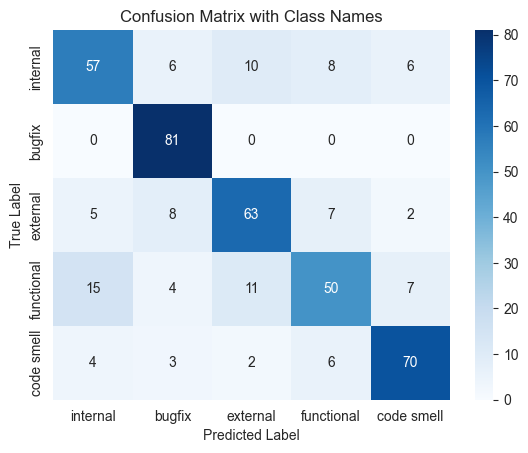

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Class Names')
plt.show()


In [96]:
y_test.unique()

array(['external', 'internal', 'functional', 'code smell', 'bugfix'],
      dtype=object)

In [97]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for deap: filename=deap-1.4.1-cp312-cp312-macosx_10_9_universal2.whl size=111356 sha256=de892eb391583658dd432ba42d94318223ee8ab7ad8d74f7ed21b2a2b6335127
  Stored in directory: /Users/onkars/Library/Caches/pip/wheels/6c/1d/91/0a68add63bf57c3263b06b3462179d244fed0ff1dbb8d5eff0
Successfully built deap


In [98]:
from deap import base, creator, tools, algorithms
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import random


In [99]:
def evalModel(individual):
    # Unpack individual parameters
    n_estimators, max_depth, criterion, bootstrap = individual
    
    # Convert binary to boolean for bootstrap
    bootstrap = True if bootstrap == 1 else False
    
    # Convert criterion to proper format
    criterion = "gini" if criterion == 1 else "entropy"
    
    # Initialize the model with the individual's parameters
    model = RandomForestClassifier(n_estimators=n_estimators, 
                                   max_depth=max_depth, 
                                   criterion=criterion, 
                                   bootstrap=bootstrap, 
                                   random_state=42)

    # Perform 3-fold cross-validation
    scores = cross_val_score(model, x_train_tfidf, y_train, cv=3)
    
    # Return the average accuracy
    return (np.mean(scores),)


In [100]:
# Define fitness and individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators for our individual components
toolbox.register("attr_n_estimators", random.randint, 100, 1000)
toolbox.register("attr_max_depth", random.randint, 10, 100)
toolbox.register("attr_criterion", random.randint, 1, 2)  # 1 for gini, 2 for entropy
toolbox.register("attr_bootstrap", random.randint, 0, 1)  # 0 for False, 1 for True

# Structure initializers for individuals and the population
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_n_estimators, toolbox.attr_max_depth, toolbox.attr_criterion, toolbox.attr_bootstrap), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic operators
toolbox.register("evaluate", evalModel)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[100, 10, 1, 0], up=[1000, 100, 2, 1], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


In [101]:
def main():
    random.seed(42)
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                        stats=stats, halloffame=hof, verbose=True)
    
    return pop, stats, hof

if __name__ == "__main__":
    population, stats, hof = main()
    print("Best individual is:", hof[0], "with fitness:", hof[0].fitness)


gen	nevals	avg     	std       	min     	max     
0  	50    	0.823263	0.00604606	0.808627	0.833725
1  	29    	0.828078	0.00422948	0.814902	0.833725
2  	33    	0.830196	0.00316167	0.816471	0.833725
3  	38    	0.830745	0.00279726	0.819608	0.833725
4  	30    	0.831357	0.00319742	0.819608	0.833725
5  	34    	0.832047	0.00369547	0.812549	0.833725
6  	31    	0.832722	0.00182285	0.824314	0.833725
7  	32    	0.832643	0.00270282	0.818824	0.833725
8  	29    	0.832737	0.0028916 	0.816471	0.833725
9  	37    	0.833145	0.00158276	0.825882	0.833725
10 	27    	0.832925	0.00213639	0.821961	0.83451 
11 	29    	0.832988	0.00304334	0.815686	0.83451 
12 	31    	0.833365	0.00201011	0.823529	0.83451 
13 	20    	0.833098	0.00283223	0.821176	0.83451 
14 	27    	0.833851	0.00191707	0.823529	0.83451 


KeyboardInterrupt: 